In [1]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

# Import database password
from config import username_password

In [2]:
# Create a connection to the database
engine = create_engine(f'postgresql://{username_password}@localhost:5432/PewlettHackard_DB')
conn = engine.connect()

In [3]:
# Query all records in the salaries table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


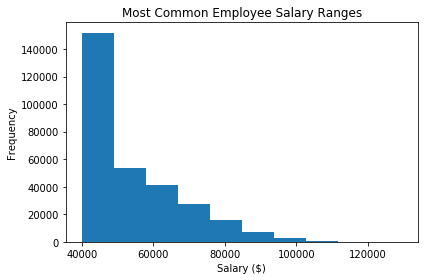

In [4]:
# Create a histogram to visualize the most common salary ranges for employees
plt.hist(salaries['salary'])
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.title('Most Common Employee Salary Ranges')
plt.tight_layout()
plt.savefig('Most Common Employee Salary Ranges.png')

In [5]:
# Query all records in the titles table
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
# Merge salaries and titles table using inner join on emp_no
salaries_titles_combined = pd.merge(salaries, titles, how="inner", on=["emp_no"])
salaries_titles_combined.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [7]:
# Calculate average salary by title
salaries_by_title = salaries_titles_combined.groupby(['title']).mean()['salary']

# Convert to DataFrame
salaries_by_title_df = pd.DataFrame(salaries_by_title)

# Reset index
salaries_by_title_df  = salaries_by_title_df.reset_index() 

# Preview DataFrame
salaries_by_title_df.head()

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


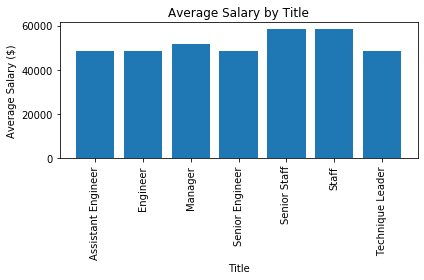

In [8]:
# Create a bar chart to visualize average salary by title
plt.bar(salaries_by_title_df['title'],salaries_by_title_df['salary'])
plt.xticks(rotation='vertical')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Title')
plt.tight_layout()
plt.savefig('Average Salary by Title')

In [9]:
# Query records in the employees table for emp_no=499942
emp_499942 = pd.read_sql("SELECT * FROM employees WHERE emp_no=499942", conn)
emp_499942.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,499942,1963-01-10,April,Foolsday,F,1997-02-10
